### MIMIC EDA here is for first blood transfusion

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

#### CABG cohort

In [107]:
hosp_stay_length = pd.read_csv('hosp_stay_time_day.csv')
hosp_stay_length

,hadm_id,gender,hosp_stay_time
0,24095816,M,6
1,22766457,M,4
2,22948163,M,4
3,28486795,M,5
4,25020643,F,4
...,...,...,...
887,29923059,M,5
888,21541542,M,4
889,25754052,M,6
890,21610721,M,5


In [175]:

def histplot_hosp_stay_time(df,name):
    
    sns.histplot(df, x="hosp_stay_time",
                  hue="gender",
                 element="step",stat="density", common_norm=False,)

    plt.title("Distribution of Hospital Stay Length ")
    plt.ylabel("Proportion")
    plt.xlabel("Hospital Stay Length (Days)")
    plt.savefig(f'Additional_CABG_plots/{name}_histplot_hosp_stay_time_gender.png')
    plt.show()

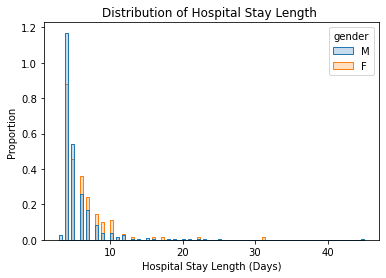

In [176]:
histplot_hosp_stay_time(hosp_stay_length,"MIMIC")

In [110]:
### Pre-transfusion &post-transfusion labevent analysis 
 #example as hemoglobin


<img src="timeline.png" width="800" height="400">

#### We use the export csv from bigquery result of the mimic dataset to do further visualization

**For condition:**
- patient having open heart surgery: cohort of pateint with CABG
- after they have left the operating room: time after the lattest outtime of careunit =  'Cardiac Surgery' (derive from the transfer table)

**Corresponding tests:**
- hemoglobin(Hb) : the mesured red cell level (from lab table in mimic_hosp)
- blood transfusion : packed red cell (from inputevent table in mimic_icu)


In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

#### Analysis for packed red cell
- blood transfusion totalamountuom distribution
- blood transfusion count distribution


In [112]:
packed_red_cells = pd.read_csv('first_transfusion.csv')
packed_red_cells = packed_red_cells.drop_duplicates(subset=['hadm_id'])
packed_red_cells


,hadm_id,gender,label,totalamount,totalamountuom,starttime
0,20006999,M,Packed Red Blood Cells,279.0,ml,2127-06-19T08:15:00
1,20032691,F,Packed Red Blood Cells,283.0,ml,2123-03-05T16:34:00
2,20044587,M,Packed Red Blood Cells,279.0,ml,2113-08-25T20:01:00
3,20087019,F,Packed Red Blood Cells,350.0,ml,2187-08-15T19:55:00
4,20088888,M,Packed Red Blood Cells,350.0,ml,2143-05-27T04:59:00
...,...,...,...,...,...,...
228,29919383,F,Packed Red Blood Cells,375.0,ml,2139-11-22T05:00:00
229,29923776,M,Packed Red Blood Cells,375.0,ml,2114-04-17T21:06:00
230,29924353,M,Packed Red Blood Cells,350.0,ml,2172-03-24T03:36:00
231,29949404,M,Packed Red Blood Cells,350.0,ml,2169-02-27T14:30:00


In [113]:
# print(f"{len(packed_red_cells.loc[packed_red_cells.gender == 'F' ])} female among CABG cohort that took blood transfusion")
# print(f"{len(packed_red_cells.loc[packed_red_cells.gender == 'M' ])} male among CABG cohort that took blood transfusion")

In [114]:
packed_red_cells.totalamount.describe()

count    232.000000
mean     336.969828
std       32.800775
min      271.000000
25%      350.000000
50%      350.000000
75%      350.000000
max      375.000000
Name: totalamount, dtype: float64

In [115]:
MIMIC_first_blood_transfusion_volumn = packed_red_cells.totalamount.values
np.save('MIMIC_first_blood_transfusion_volumn', MIMIC_first_blood_transfusion_volumn)

In [116]:
def histplot_bloodtransfusion_volume(packed_red_cells,name):
    
    sns.histplot(packed_red_cells, x="totalamount", element="step",
    stat="probability", common_norm=False,)
    print(f'mean is {round(np.mean(packed_red_cells.totalamount.values),2)} and std is {round(np.std(packed_red_cells.totalamount.values),2)}')
    
    plt.xlabel("Total Blood Transfusion Amount (ml)")
    plt.ylabel("Proportion")
    plt.title("Distribution of Total Blood Transfusion Amount")
#     plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume.png')
    plt.show()
    
    
    #sns.displot(data=packed_red_cells,x="totalamount",stat='density',hue = 'gender',kde = True)
    sns.histplot(packed_red_cells, x="totalamount", hue="gender", element="step",stat="probability", common_norm=False,)
    
    female = packed_red_cells.loc[packed_red_cells['gender'] =='F']
    male = packed_red_cells.loc[packed_red_cells['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.totalamount.values),2)} and std is {round(np.std(female.totalamount.values),2)}')
    print(f'For male mean is {round(np.mean(male.totalamount.values))} and std is {round(np.std(male.totalamount.values),2)}')
              
    plt.xlabel("Total Blood Transfusion Amount (ml)")
    plt.ylabel("Proportion")
    plt.title("Distribution of Total Blood Transfusion")
#     plt.legend()
#     plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume_gender.png')
    plt.show()


mean is 336.97 and std is 32.73


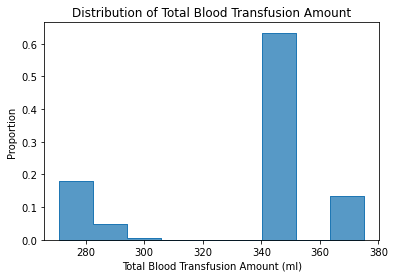

For female mean is 331.09 and std is 34.84
For male mean is 339 and std is 31.76


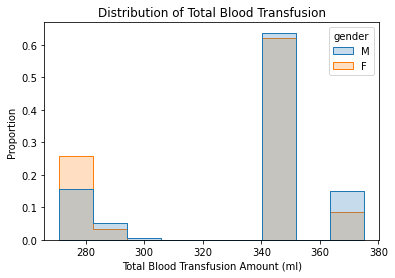

In [117]:
histplot_bloodtransfusion_volume(packed_red_cells,"MIMIC")

In [118]:
blood_transfusion_count = pd.read_csv('blood_transfusion_counts.csv')
#blood_transfusion_count = packed_red_cells.drop_duplicates(subset=['hadm_id'])
blood_transfusion_count

,hadm_id,gender,counts
0,20006999,M,2
1,20032691,F,1
2,20044587,M,3
3,20087019,F,3
4,20088888,M,3
...,...,...,...
227,29919383,F,2
228,29923776,M,4
229,29924353,M,4
230,29949404,M,2


In [119]:
len(np.setdiff1d(np.array(hosp_stay_length.hadm_id) , np.array(packed_red_cells.hadm_id)))

660

In [120]:
def histplot_bloodtransfusion_counts(packed_red_cells,name):
    
 
    sns.histplot(packed_red_cells, x="counts", hue="gender", element="step",
    stat="density", common_norm=False,)
    
    
#     plt.legend(prop={'size': 12})
    plt.title('Distribution of Number of Blood Transfusions')
    plt.xlabel('Number of Blood Transfusions')
    plt.ylabel('Proportion')
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    
    

def boxplot_bloodtransfusion_counts(blood_transfusion_count,name):
    sns.boxplot(x="gender", y='counts', data=blood_transfusion_count)
    plt.title("Number of Blood Transfusions")
    plt.xlabel("Gender")
    plt.ylabel('Number of Blood Transfusions')
    plt.savefig(f'Bloodtransfusion_plots/{name}_boxplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    

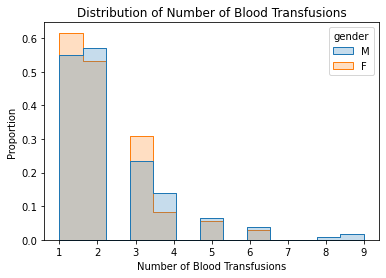

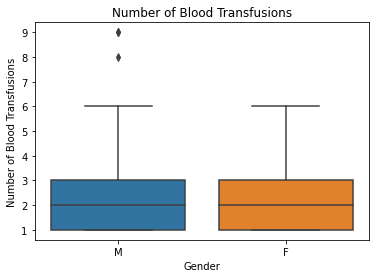

In [121]:
histplot_bloodtransfusion_counts(blood_transfusion_count,"MIMIC")
boxplot_bloodtransfusion_counts(blood_transfusion_count,"MIMIC")


#### Labevent analysis
- example as hemoglobin and can be applied to other labevent
    - step1: get csv file from sql: just change the line95 in INR(PT) query to any other labevent label name

    - step2: run function get_EDA(INR_PT,"INR_PT") where INR_PT is the dataframe read from csv file and "INR_PT" is labevent label name
- measurements that pointed out by clinician collected and shown in the dataframe

- correlation between value measurements (scatterplot)
    - value diff vs pretransfusion
    - value diff vs posttransfusion  
- value measurements under different number of blood transfusion (boxplot,distribution(with and without gender feature))
    - pretransfusion 
    - posttransfusion   
- value measurements vs time measurements (scatterplot)
    - posttransfusion vs time between posttransfusion and first blood transfusion
    - pretransfusion vs time between pretransfusion and first blood transfusion
    - value diff vs time between posttransfusion and pretransfusion
    - value diff vs time between pretransfusion and first blood transfusion
- time measurement distribution (distribution, boxplot)
    - time between irst blood transfusion and posttransfusion
    - time between pretransfusion and first blood transfusion
    
##### Note additional preprocess for hemoglobin
- Hemoglobin measurements from two table labevents and charevents
- But 4552 of the 4574 measurements in charevent are duplicates with labevent, which means we only get 22 more records
    

In [122]:
lablist = pd.read_csv('lablist.csv')
#lablist[lablist.counts ==892]
print(f"{list(lablist[lablist.counts ==892].description)} are labevents that all pateint measured")

['INR(PT)', 'Hematocrit, Calculated', 'RDW', 'MCHC', 'Hematocrit', 'MCV', 'MCH', 'PT', 'PTT', 'White Blood Cells', 'Platelet Count', 'Hemoglobin', 'Red Blood Cells', 'Chloride, Whole Blood', 'Calculated Total CO2', 'Base Excess', 'Potassium, Whole Blood', 'Anion Gap', 'Bicarbonate', 'Chloride', 'Sodium', 'Sodium, Whole Blood', 'Potassium', 'Urea Nitrogen', 'Creatinine', 'Glucose', 'pO2', 'pCO2', 'pH', 'Free Calcium', 'Lactate'] are labevents that all pateint measured


In [123]:
hemoglobin= pd.read_csv('Hemoglobin.csv')
hemoglobin

,hadm_id,gender,description,pre_transfusion,post_transfusion,value_diff,valueuom,charttime_before,first_blood_transfusion_starttime,charttime_after,labevent_time_diff_min,labevent_before_tranfusion_diff_min,labevent_after_tranfusion_diff_min,blood_counts
0,20172535,M,Hemoglobin,9.2,11.3,2.1,g/dL,2157-09-13T02:47:00,2157-09-13T14:45:00,2157-09-13T18:55:00,968,718,250,1
1,24148248,M,Hemoglobin,8.9,9.3,0.4,g/dL,2130-12-11T16:29:00,2130-12-11T21:01:00,2130-12-11T21:59:00,330,272,58,1
2,28522522,F,Hemoglobin,7.2,10.2,3.0,g/dL,2128-06-25T02:19:00,2128-06-25T03:45:00,2128-06-26T02:33:00,1454,86,1368,2
3,29912299,M,Hemoglobin,8.1,8.0,-0.1,g/dL,2122-02-17T02:11:00,2122-02-17T10:41:00,2122-02-18T03:17:00,1506,510,996,2
4,25020643,F,Hemoglobin,8.9,9.2,0.3,g/dL,2157-12-01T02:35:00,2157-12-01T15:10:00,2157-12-01T20:16:00,1061,755,306,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,28530035,F,Hemoglobin,8.3,11.3,3.0,g/dL,2168-03-01T15:30:00,2168-03-01T16:30:00,2168-03-02T03:00:00,690,60,630,1
230,25140639,M,Hemoglobin,9.4,9.5,0.1,g/dL,2131-02-14T13:32:00,2131-02-14T18:48:00,2131-02-15T02:49:00,797,316,481,2
231,29636680,M,Hemoglobin,7.4,9.1,1.7,g/dL,2141-01-05T17:20:00,2141-01-05T18:18:00,2141-01-05T20:23:00,183,58,125,9
232,20032691,F,Hemoglobin,8.0,9.9,1.9,g/dL,2123-03-05T13:10:00,2123-03-05T16:34:00,2123-03-05T22:59:00,589,204,385,1


In [124]:
first_pre_transfusion = hemoglobin.pre_transfusion.values
np.save('MIMIC_first_pre_transfusion', first_pre_transfusion)

first_pre_transfusion_male = hemoglobin.loc[hemoglobin.gender == 'M'].pre_transfusion.values
np.save('MIMIC_first_pre_transfusion_male', first_pre_transfusion_male)

first_pre_transfusion_female = hemoglobin.loc[hemoglobin.gender == 'F'].pre_transfusion.values
np.save('MIMIC_first_pre_transfusion_female', first_pre_transfusion_female)

In [125]:
time_first_pre_transfusion = hemoglobin.labevent_before_tranfusion_diff_min.values
np.save('MIMIC_time_first_pre_transfusion', time_first_pre_transfusion)

time_first_pre_transfusion_male = hemoglobin.loc[hemoglobin.gender == 'M'].labevent_before_tranfusion_diff_min.values
np.save('MIMIC_time_first_pre_transfusion_male', time_first_pre_transfusion_male)

time_first_pre_transfusion_female = hemoglobin.loc[hemoglobin.gender == 'F'].labevent_before_tranfusion_diff_min.values
np.save('MIMIC_time_first_pre_transfusion_female', time_first_pre_transfusion_female)

In [126]:
hemoglobin =hemoglobin.sort_values(by=['gender'] ,ascending = False)

In [127]:
hemoglobin.loc[hemoglobin.gender == 'F'].pre_transfusion.describe()
# hemoglobin.loc[hemoglobin.gender == 'M'].pre_transfusion.describe()

count    58.000000
mean      8.882759
std       1.050670
min       6.900000
25%       8.200000
50%       8.700000
75%       9.675000
max      11.800000
Name: pre_transfusion, dtype: float64

In [128]:

#hemoglobin.loc[hemoglobin.gender == 'F'].value_diff.describe()
hemoglobin.value_diff.describe()

count    234.000000
mean       0.784188
std        1.382682
min       -4.700000
25%        0.100000
50%        0.800000
75%        1.800000
max        4.500000
Name: value_diff, dtype: float64

mean is 8.97 and std is 1.15 and max is 13.0


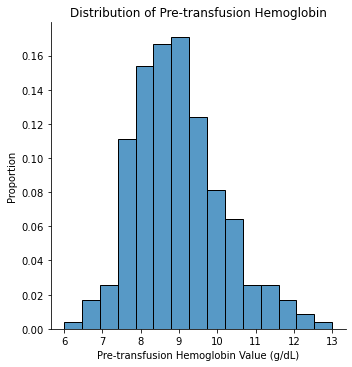

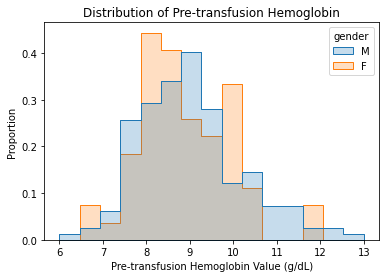

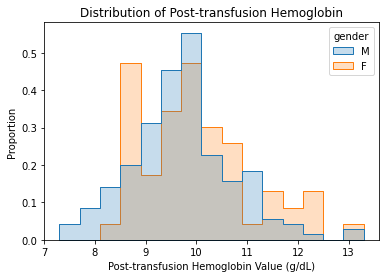

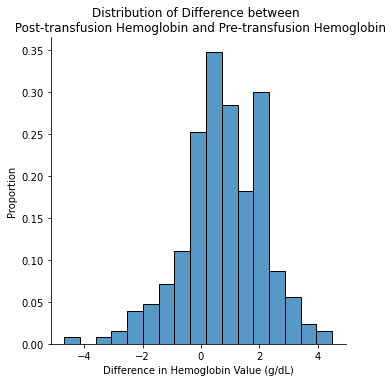

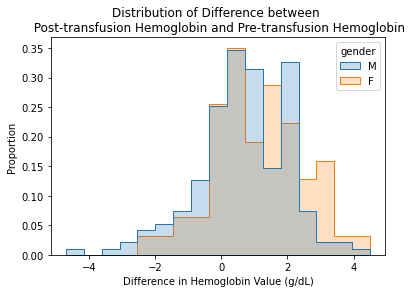

In [129]:
def get_hemoglobin_distribution(hemoglobin,name):

    
#     sns.displot(data=hemoglobin, x="pre_transfusion", stat="proportion")
    sns.displot(data=hemoglobin, x="pre_transfusion", stat="probability")
    print(f'mean is {round(np.mean(hemoglobin.pre_transfusion.values),2)} and std is {round(np.std(hemoglobin.pre_transfusion.values),2)} and max is {round(np.max(hemoglobin.pre_transfusion.values),2)}')
    

    #plt.legend(prop={'size': 12})
    plt.title('Distribution of Pre-transfusion Hemoglobin')
    plt.xlabel('Pre-transfusion Hemoglobin Value (g/dL)')
    plt.ylabel('Proportion')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_Pre-transfusion_hemoglobin.png')
    plt.show()
    
    sns.histplot(hemoglobin, x="pre_transfusion", hue="gender", element="step",
    stat="density", common_norm=False,)
   
    plt.title('Distribution of Pre-transfusion Hemoglobin')
    plt.xlabel('Pre-transfusion Hemoglobin Value (g/dL)')
    plt.ylabel('Proportion')
    
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_Post-transfusion_hemoglobin_gender.png')
    plt.show()
    
    
    sns.histplot(hemoglobin, x="post_transfusion", hue="gender", element="step",
    stat="density", common_norm=False,)
    #plt.legend(prop={'size': 12})
    plt.title('Distribution of Post-transfusion Hemoglobin')
    plt.xlabel('Post-transfusion Hemoglobin Value (g/dL)')
    plt.ylabel('Proportion')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_Post-transfusion_hemoglobin_gender.png')
    plt.show()  
    
    
    
    sns.displot(data=hemoglobin, x="value_diff", stat="density")
#     plt.hist(hemoglobin.value_diff,alpha=0.8, weights=np.ones_like(hemoglobin.value_diff) / len(hemoglobin.value_diff))


    #plt.legend(prop={'size': 12})
    plt.title('Distribution of Difference between \n Post-transfusion Hemoglobin and Pre-transfusion Hemoglobin')
    plt.xlabel('Difference in Hemoglobin Value (g/dL)')
    plt.ylabel('Proportion')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_value_diff_hemoglobin.png')
    plt.show()
    
    
    sns.histplot(hemoglobin, x="value_diff", hue="gender", element="step",
    stat="density", common_norm=False,)
    
    
    plt.title('Distribution of Difference between \n Post-transfusion Hemoglobin and Pre-transfusion Hemoglobin')
    plt.xlabel('Difference in Hemoglobin Value (g/dL)')
    plt.ylabel('Proportion')
#     plt.savefig(f'labevent_plots/{name}_Distribution_of_value_diff_hemoglobin_gender.png')
    plt.show()
    
get_hemoglobin_distribution(hemoglobin,'MIMIC')    

In [130]:
def scatter_ValueDiff_Pretransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="pre_transfusion", y="value_diff", hue="gender")
    plt.xlabel('Pre-transfusion Value (g/dL)')
    plt.ylabel("Value Diff")
    plt.title("Value Diff vs Pre-transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_ValueDiff_Pretransfusion.png')
    plt.show()

def scatter_ValueDiff_Posttransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="post_transfusion", y="value_diff", hue="gender")
    plt.xlabel('Post-transfusion Value (g/dL)')
    plt.ylabel("Value Diff")
    plt.title("Value Diff vs Post-transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_ValueDiff_Posttransfusion.png')
    plt.show()
    
def scatter_Counts_Pretransfusion(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x="pre_transfusion", y="blood_counts", hue="gender")
    plt.xlabel('Pre-transfusion Value (g/dL)')
    plt.ylabel("Blood Transfusion Counts")
    plt.title("Blood Transfusion Counts vs Pre-transfusion Value")
    plt.savefig(f'labevent_plots/{name}_scatter_Counts_Pretransfusion.png')
    plt.show()
    
def boxplot_Pretransfusion_Bloodtransfusion(df,name):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='blood_counts', y='pre_transfusion')
    plt.ylabel('Pre-transfusion Value (g/dL)')
    plt.xlabel("Blood Transfusion Counts")
    plt.savefig(f'labevent_plots/{name}_boxplot_Pretransfusion_Bloodtransfusion.png')
    plt.show()

def boxplot_Posttransfusion_Bloodtransfusion(df,name):
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df, x='blood_counts', y='post_transfusion')
    plt.savefig(f'labevent_plots/{name}_boxplot_Posttransfusion_Bloodtransfusion.png')
    plt.show()

def multiline_Pretransfusion_Bloodtransfusion(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Pre-transfusion Value for Patient with Different Number of Blood Transfusions')


    for axes_num1 in range(3):

        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]


        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['pre_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().pre_transfusion

        if(count==3):
            axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
        else:
            axes[axes_num1].set_title('Blood Transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))

        axes[2].set_xlabel("Pre-transfusion Value (g/dL)")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Pretransfusion_Bloodtransfusion.png')
    fig.show()

def multiline_Pretransfusion_Bloodtransfusion_gender(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Pre-transfusion Value for Patient with Different Number of Blood Transfusions')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['pre_transfusion'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['pre_transfusion'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['pre_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().pre_transfusion
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+ '| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood Transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Pre-transfusion Value (g/dL)")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Pretransfusion_Bloodtransfusion_gender.png')
    fig.show()

def multiline_Posttransfusion_Bloodtransfusion_gender(df,name):
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Post-transfusion Value for Patient with Different Number of Blood Transfusions')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['post_transfusion'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['post_transfusion'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['post_transfusion'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().post_transfusion
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood Transfusion >='+str(count)+  '|Patients '+str(len(partial_fbt_time_differece_Hb))+ '| Mean ' + str(round(mean,3))+'| F Mean '+str(round(fmean,3)) + '| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood Transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3))+'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Post_transfusion Value (g/dL)")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_Posttransfusion_Bloodtransfusion_gender.png')
    fig.show()
        
def multiline_valuediff_Bloodtransfusion_gender(df,name):
    #value_diff
    row = 3
    col = 1
    fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
    fig.suptitle('Value Diff for Patient with Different Number of Blood Transfusions')


    for axes_num1 in range(3):
        count = axes_num1+1

        if(count==3):
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts >= count)]
        else:
            partial_fbt_time_differece_Hb = df.loc[(df.blood_counts == count)]

        male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender == 'M']
        sns.kdeplot(ax=axes[axes_num1],x=male_Hb['value_diff'], label='male')
        female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender== 'F']
        sns.kdeplot(ax=axes[axes_num1],x=female_Hb['value_diff'],label='female')
        sns.kdeplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['value_diff'],label='All')
        mean= partial_fbt_time_differece_Hb.mean().value_diff
        fmean = female_Hb.pre_transfusion.mean()
        mmean= male_Hb.pre_transfusion.mean()

        if(count==3):
            axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))
        else:
            axes[axes_num1].set_title('Blood Transfusion '+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)) +'| F Mean '+str(round(fmean,3)) +'| M Mean '+str(round(mmean,3)))


        axes[2].set_xlabel("Value Diff (g/dL)")
        axes[axes_num1].legend(loc='upper right')
    fig.savefig(f'labevent_plots/{name}_multiline_valuediff_Bloodtransfusion_gender.png')
    fig.show()
        
def boxplot_Pretransfusion_Bloodtransfusion_gender(df,name):
    
    plt.figure(figsize=(7, 7))
    sns.boxplot(data=df, x='blood_counts', y='pre_transfusion', hue="gender")
    plt.xlabel("Blood counts", fontsize=14)
    plt.ylabel("Pre transfusion", fontsize=14)
    plt.title("Pre transfusion by blood counts & gender Group")
    plt.savefig(f'labevent_plots/{name}_boxplot_Pretransfusion_Bloodtransfusion_gender.png')
    plt.show()
    
        
def scatter_Pretransfusion_PreFbtTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_before_tranfusion_diff_min", x="pre_transfusion", hue="gender")
    plt.xlabel('Pre-transfusion value')
    plt.ylabel("Time between Pre-transfusion and First Blood Transfusion (Minutes)")
    plt.title("Pre-transfusion Value vs Time \n between Pre-transfusion and First Blood Transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_Pretransfusion_PreFbtTime.png')
    plt.show()  
    
    
def scatter_Posttransfusion_FbtPostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_after_tranfusion_diff_min", x="post_transfusion", hue="gender")
    plt.ylabel('Time between Blood Transfusion and Post-transfusion (Minutes)')
    plt.xlabel("Post-transfusion Value (g/dL)")
    plt.title("Post-transfusion value vs Time \n between blood transfusion and Post-transfusion")
    plt.savefig(f'labevent_plots/{name}_scatter_Posttransfusion_FbtPostTime.png')
    plt.show()  
    
def scatter_Valuediff_PrePostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_time_diff_min", x="value_diff", hue="gender")
    plt.ylabel('Time between pre-transfusion  and post-transfusion (Minutes)')
    plt.xlabel("Value diff (g/dL)")
    plt.title("Measurement Difference between Before and After (g/dL)")
    plt.savefig(f'labevent_plots/{name}_scatter_Valuediff_PrePostTime.png')
    plt.show()  
    
def scatter_Valuediff_FbtPostTime(df,name):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, y="labevent_after_tranfusion_diff_min", x="value_diff", hue="gender")
    plt.xlabel('Value diff')
    plt.ylabel("Time between First Blood Transfusion and Post-transfusion (Minutes)")
    plt.title("Measurement Difference between Before and After (g/dL)")
    plt.savefig(f'labevent_plots/{name}_scatter_Valuediff_FbtPostTime.png')
    plt.show()  
    

def histplot_PosttransfusionTime(df,name):
    plt.figure(figsize=(7,7))
    sns.histplot(data=df, x="labevent_after_tranfusion_diff_min", kde=True)
    plt.xlabel("Time Difference First Blood Transfusion and Post-transfusion (Minutes)")
    plt.title("Time Difference between First Blood Transfusion and Post-transfusion (Minutes)")
    plt.savefig(f'labevent_plots/{name}_histplot_PosttransfusionTime.png')
    plt.show()   
    

def boxplot_PosttransfusionTime(df,name):
    sns.boxplot(x="gender", y="labevent_after_tranfusion_diff_min", data=df)
    plt.title("Time Difference between First Blood Transfusion and Post-transfusion (Minutes)")
    plt.ylabel("Time Difference (Minutes)")
    plt.savefig(f'labevent_plots/{name}_boxplot_PosttransfusionTime.png')
    plt.show()   
    
def histplot_PretransfusionTime(df,name):
    plt.figure(figsize=(7,7))
#     sns.histplot(data=df, x="labevent_before_tranfusion_diff_min", kde=True)
    sns.histplot(df,x = "labevent_before_tranfusion_diff_min",stat="probability",element="step",common_norm=False)
    print(f'mean is {round(np.mean(df.labevent_before_tranfusion_diff_min.values),2)} and std is {round(np.std(df.labevent_before_tranfusion_diff_min.values),2)}')

    plt.xlabel("Time between Pre-transfusion and First Blood Transfusion (Minutes)")
    plt.ylabel("Proportion")
    plt.title("Time Difference between Pre-transfusion and First Blood Transfusion (Minutes)")
    plt.savefig(f'labevent_plots/{name}_histplot_PretransfusionTime.png')
    plt.show()   

def histplot_PretransfusionTime_gender(df,name):
    sns.histplot(df,x = "labevent_before_tranfusion_diff_min",stat="probability",hue = "gender",element="step",common_norm=False)
    female = df.loc[df['gender'] =='F']
    male = df.loc[df['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.labevent_before_tranfusion_diff_min.values),2)} and std is {round(np.std(female.labevent_before_tranfusion_diff_min.values),2)}')
    print(f'For male mean is {round(np.mean(male.labevent_before_tranfusion_diff_min.values))} and std is {round(np.std(male.labevent_before_tranfusion_diff_min.values),2)}')
    plt.title('Time Interval between First-blood Transfusion and the Latest hb Test')
    plt.xlabel("Time Interval (Minutes)")
    plt.ylabel('Proportion')
    plt.show()

def boxplot_PretransfusionTime(df,name):
    sns.boxplot(x="gender", y="labevent_before_tranfusion_diff_min", data=df)
    plt.title("Time Interval between Pre-transfusion and First Blood Transfusion (Minutes)")
    plt.ylabel("Time Interval (Minutes)")
    plt.xlabel("Gender")
    plt.savefig(f'labevent_plots/{name}_boxplot_PretransfusionTime.png')
    plt.show()   
    
    
    

In [131]:
def get_EDA(df,name):
    
    
    print(f"Below EDA is for labevents {name}")
#     scatter_ValueDiff_Pretransfusion(df,name)
#     scatter_ValueDiff_Posttransfusion(df,name)
#     scatter_Counts_Pretransfusion(df,name)
#     boxplot_Pretransfusion_Bloodtransfusion(df,name)
#     boxplot_Posttransfusion_Bloodtransfusion(df,name)
#     multiline_Pretransfusion_Bloodtransfusion(df,name)
#     multiline_Pretransfusion_Bloodtransfusion_gender(df,name)
#     multiline_Posttransfusion_Bloodtransfusion_gender(df,name)
#     multiline_valuediff_Bloodtransfusion_gender(df,name)
#     boxplot_Pretransfusion_Bloodtransfusion_gender(df,name)
#     scatter_Pretransfusion_PreFbtTime(df,name)
#     scatter_Posttransfusion_FbtPostTime(df,name)
#     scatter_Valuediff_PrePostTime(df,name)
#     scatter_Valuediff_FbtPostTime(df,name)

#     histplot_PosttransfusionTime(df,name)
#     boxplot_PosttransfusionTime(df,name)
    histplot_PretransfusionTime(df,name)
    histplot_PretransfusionTime_gender(df,name)
    boxplot_PretransfusionTime(df,name)
    
    return 

Below EDA is for labevents Hemoglobin
mean is 289.73 and std is 241.57


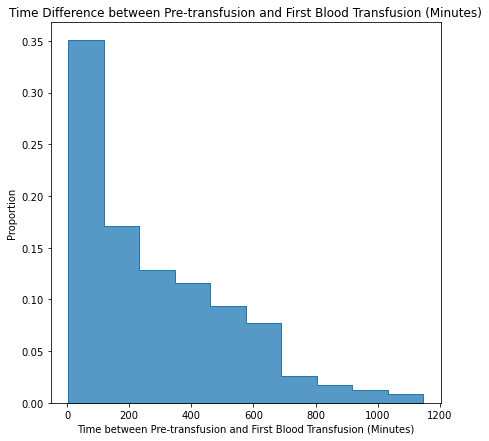

For female mean is 302.9 and std is 236.74
For male mean is 285 and std is 242.98


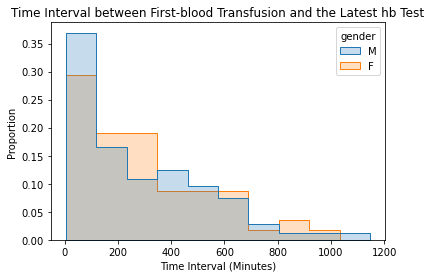

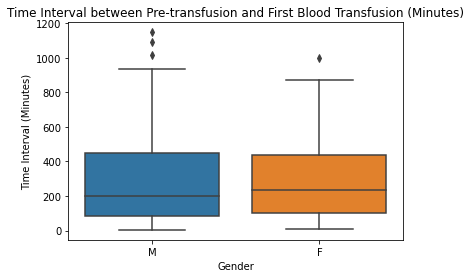

In [132]:
get_EDA(hemoglobin,"Hemoglobin")

#### Clinician interest on Hemoglobin measurement
- number of time that hemoglobin was measured right from the beginning of the surgery to the first 24 hours of the intensive care 

In [133]:
hemoglobin_24h_count = pd.read_csv('hemoglobin_24h_count.csv') 
hemoglobin_24h_count

,hadm_id,gender,counts
0,21793708,M,3
1,25175175,M,3
2,23478116,M,3
3,26262347,M,4
4,26943137,M,5
...,...,...,...
805,21506797,M,13
806,28196463,M,14
807,23027623,M,14
808,27279120,M,15


In [134]:
# MIMIC_hemoglobin_24h_Hb_count = hemoglobin_24h_count.counts.values
# np.save('MIMIC_hemoglobin_24h_Hb_count', MIMIC_hemoglobin_24h_Hb_count)

In [135]:
def histplot_24H_Hb_measurement(df,name):
    # without gender
#     plt.figure(figsize=(7,7))
#     sns.displot(data=df, x="counts", stat="density")
#     sns.histplot(data=df, x="counts", kde=True)
    sns.histplot(df, x="counts", element="step",
    stat="density", bins = 14,common_norm=False,)  
    print(f'mean is {round(np.mean(df.counts.values),2)} and std is {round(np.std(df.counts.values),2)}')

    plt.title('Number of Hemoglobin Measurements from \n the Beginning of the Surgery to the First 24 Hours of the Intensive Care')
    plt.xlabel('Number of Hemoglobin Measurements')
    plt.ylabel('Proportion')
    plt.savefig(f'Additional_Hb_plots/histplot_numberOfHBmeasurement24H.png')
    plt.show() 
    
    
    # for gender
    sns.histplot(df, x="counts", hue="gender", element="step",
    stat="density", common_norm=False, bins = 14)  
    female = df.loc[df['gender'] =='F']
    male = df.loc[df['gender'] =='M']
    print(f'For female mean is {round(np.mean(female.counts.values),2)} and std is {round(np.std(female.counts.values),2)}')
    print(f'For male mean is {round(np.mean(male.counts.values))} and std is {round(np.std(male.counts.values),2)}')
   
    plt.title('Number of Hemoglobin Measurements from \n the Beginning of the Surgery to the First 24 Hours of the Intensive Care')
    plt.xlabel('Number of Hemoglobin Measurements')
    plt.ylabel('Proportion')
    plt.savefig(f'Additional_Hb_plots/histplot_numberOfHBmeasurement24H_gender.png')
    plt.show()
    
    
    
    sns.boxplot(x="gender", y='counts', data=df)
    plt.title("Number of Hemoglobin Measurements")
    plt.ylabel('Number of Hemoglobin Measurements')
    plt.xlabel("Gender")
    plt.savefig(f'Additional_Hb_plots/boxplot_numberOfHBmeasurement24H_gender.png')
    plt.show()



mean is 7.61 and std is 1.53


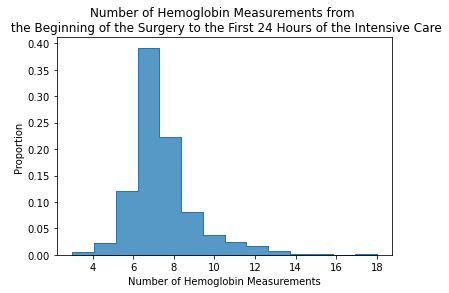

For female mean is 7.73 and std is 1.66
For male mean is 8 and std is 1.5


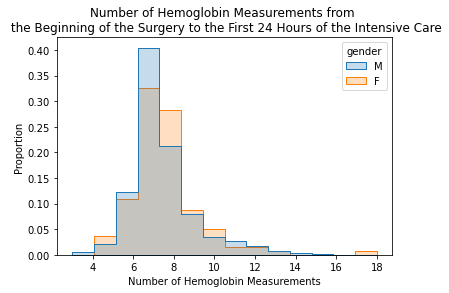

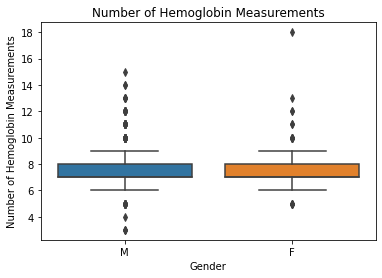

In [136]:
histplot_24H_Hb_measurement(hemoglobin_24h_count,'MIMIC')

### Drain Status
- From mimic-icu output events, labelled as Chest Tube(ml)
- Time after last hemoglbin measured and within 1 day

<strong>Total Drain </strong>: Sum of the chest tube value

<strong>Drain per minute </strong>: Total Drain divided by the time between the earliest time drain status measured  and first blood transfusion   


### Analysis on drain Status value 
- correlation to hemoglobin value difference
    - value diff vs total Drain
    - value diff vs drain per minute
- distribution under different number of blood transfusion 
    - total Drain (without gender and with gender)
    - drain per minute (without gender and with gender)

In [137]:
drain = pd.read_csv('drain_status.csv')
drain = drain.sort_values(by='gender',ascending=False)
drain 

,hadm_id,gender,value_before,value_diff,min_chest_tube_time,fbt_time,total_drain,drain_time_diff_min,drain_per_min
0,24479359,M,8.4,0.9,2140-05-06T04:00:00,2140-05-06T11:13:00,270.0,433,0.623557
112,20122879,M,8.0,0.9,2113-11-27T03:00:00,2113-11-27T17:30:00,330.0,870,0.379310
114,25620803,M,10.0,0.1,2124-09-02T19:00:00,2124-09-02T22:41:00,397.0,221,1.796380
115,24785909,M,10.5,-1.4,2170-03-06T15:05:00,2170-03-06T22:24:00,270.0,439,0.615034
116,23430222,M,8.0,2.3,2186-05-20T16:04:00,2186-05-20T16:34:00,30.0,30,1.000000
...,...,...,...,...,...,...,...,...,...
27,20464567,F,8.4,0.3,2137-05-26T13:30:00,2137-05-26T22:00:00,340.0,510,0.666667
102,27361984,F,8.5,1.5,2177-11-28T02:00:00,2177-11-28T06:42:00,130.0,282,0.460993
53,20326682,F,8.7,1.6,2188-01-19T03:00:00,2188-01-19T08:30:00,250.0,330,0.757576
155,24470837,F,9.3,-0.5,2147-10-22T17:00:00,2147-10-22T18:44:00,50.0,104,0.480769


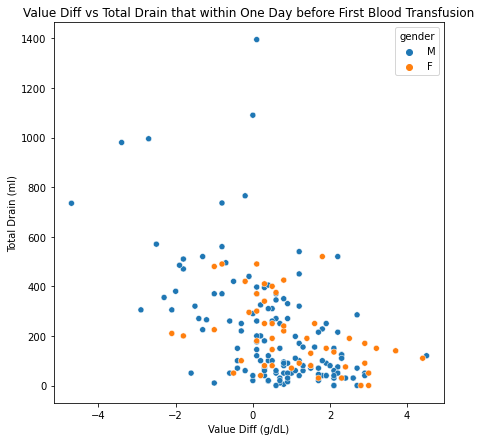

In [138]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=drain, x="value_diff", y="total_drain", hue="gender")
plt.xlabel('Value Diff (g/dL)')
plt.ylabel("Total Drain (ml)")
plt.title("Value Diff vs Total Drain that within One Day before First Blood Transfusion")
plt.savefig(f'Additional_Hb_plots/scatter_totalDrain_valuediff.png')
plt.show()

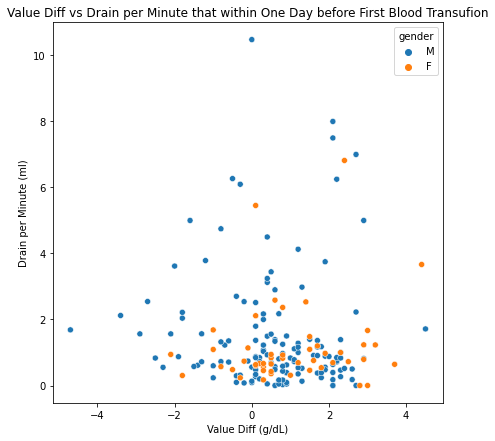

In [139]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=drain, x="value_diff", y="drain_per_min", hue="gender")
plt.xlabel('Value Diff (g/dL)')
plt.ylabel("Drain per Minute (ml)")
plt.title("Value Diff vs Drain per Minute that within One Day before First Blood Transufion")
plt.savefig(f'Additional_Hb_plots/scatter_Drain_per_min_valuediff.png')
plt.show()

In [140]:
drain_blood_counts = drain.merge(blood_transfusion_count, how = 'left', on='hadm_id')
drain_blood_counts


,hadm_id,gender_x,value_before,value_diff,min_chest_tube_time,fbt_time,total_drain,drain_time_diff_min,drain_per_min,gender_y,counts
0,24479359,M,8.4,0.9,2140-05-06T04:00:00,2140-05-06T11:13:00,270.0,433,0.623557,M,2
1,20122879,M,8.0,0.9,2113-11-27T03:00:00,2113-11-27T17:30:00,330.0,870,0.379310,M,1
2,25620803,M,10.0,0.1,2124-09-02T19:00:00,2124-09-02T22:41:00,397.0,221,1.796380,M,2
3,24785909,M,10.5,-1.4,2170-03-06T15:05:00,2170-03-06T22:24:00,270.0,439,0.615034,M,1
4,23430222,M,8.0,2.3,2186-05-20T16:04:00,2186-05-20T16:34:00,30.0,30,1.000000,M,4
...,...,...,...,...,...,...,...,...,...,...,...
182,20464567,F,8.4,0.3,2137-05-26T13:30:00,2137-05-26T22:00:00,340.0,510,0.666667,F,2
183,27361984,F,8.5,1.5,2177-11-28T02:00:00,2177-11-28T06:42:00,130.0,282,0.460993,F,1
184,20326682,F,8.7,1.6,2188-01-19T03:00:00,2188-01-19T08:30:00,250.0,330,0.757576,F,2
185,24470837,F,9.3,-0.5,2147-10-22T17:00:00,2147-10-22T18:44:00,50.0,104,0.480769,F,3


/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/971078708.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= partial_fbt_time_differece_Hb.mean().drain_per_min
/Users/hern/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/971078708.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


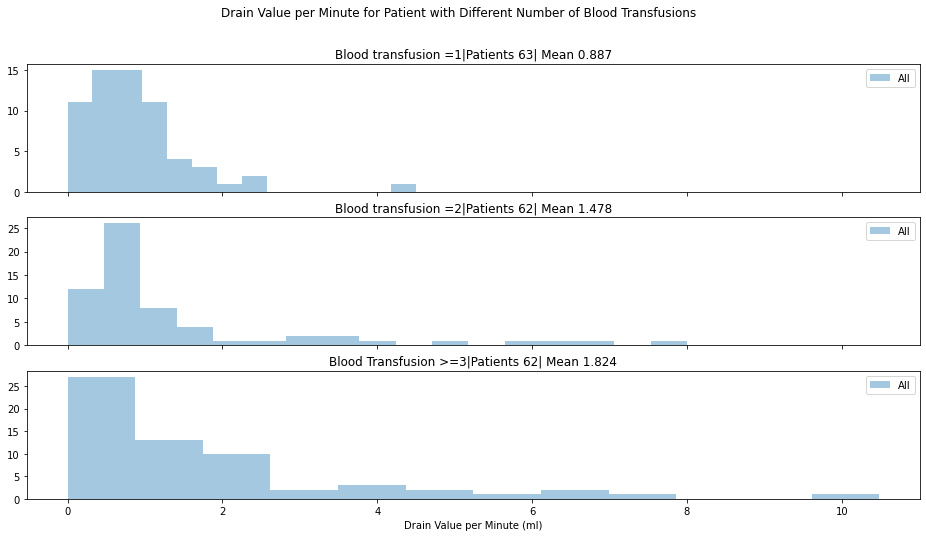

In [141]:
#value_diff
row = 3

col = 1
fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
fig.suptitle('Drain Value per Minute for Patient with Different Number of Blood Transfusions')


for axes_num1 in range(3):
    count = axes_num1+1
    df = drain_blood_counts
   
    if(count==3):
        partial_fbt_time_differece_Hb = df.loc[(df.counts >= count)]
    else:
        partial_fbt_time_differece_Hb = df.loc[(df.counts == count)]
    
    mean= partial_fbt_time_differece_Hb.mean().drain_per_min
    sns.distplot(x= partial_fbt_time_differece_Hb['drain_per_min'],label='All',kde= False,ax=axes[axes_num1])
    
    
    
    
    
    #fmean = female_Hb.mean().pre_transfusion
    #mmean= male_Hb.mean().pre_transfusion
    
    if(count==3):
        axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ 
                                  '|Patients '+str(len(partial_fbt_time_differece_Hb))+
                                  '| Mean ' + str(round(mean,3)))
                                  #+'| F Mean'+str(round(fmean,3)) +
                                                                                #'| M Mean'+str(round(mmean,3)))
    else:
        axes[axes_num1].set_title('Blood transfusion ='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
    
    axes[2].set_xlabel("Drain Value per Minute (ml)")
    axes[axes_num1].legend(loc='upper right')
fig.savefig(f'Additional_Hb_plots/multihistplots_drain_per_min_Bloodtransfusion.png')
fig.show()

/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/683047642.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


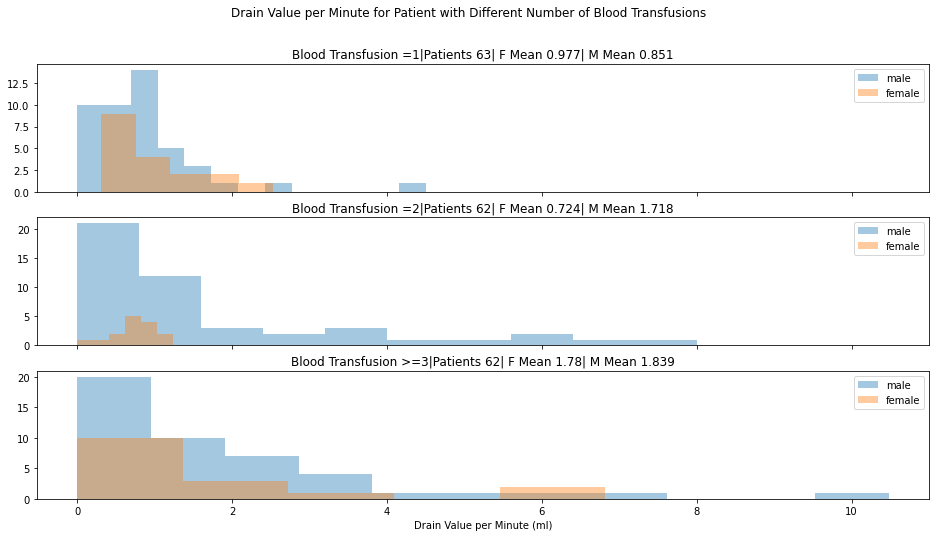

In [142]:
#value_diff
row = 3

col = 1
fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
fig.suptitle('Drain Value per Minute for Patient with Different Number of Blood Transfusions')


for axes_num1 in range(3):
    count = axes_num1+1
    df = drain_blood_counts
   
    if(count==3):
        partial_fbt_time_differece_Hb = df.loc[(df.counts >= count)]
    else:
        partial_fbt_time_differece_Hb = df.loc[(df.counts == count)]
    
    male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'M']
    sns.distplot(x=male_Hb['drain_per_min'], label='male',kde= False,ax=axes[axes_num1])
    female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'F']
    sns.distplot(x=female_Hb['drain_per_min'],label='female',kde= False,ax=axes[axes_num1])
    #sns.kdeplot(x= partial_fbt_time_differece_Hb['drain_per_min'],label='All',kde= False,ax=axes[axes_num1])
    fmean= female_Hb.drain_per_min.mean()
    mmean= male_Hb.drain_per_min.mean()
    #sns.distplot(x= partial_fbt_time_differece_Hb['drain_per_min'],label='All',kde= False,ax=axes[axes_num1])
    
    
    
    
    
    #fmean = female_Hb.mean().pre_transfusion
    #mmean= male_Hb.mean().pre_transfusion
    
    if(count==3):
        axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ 
                                  '|Patients '+str(len(partial_fbt_time_differece_Hb))+
                                  #'| Mean ' + str(round(mean,3)))
                                  '| F Mean '+str(round(fmean,3)) +
                                                                                '| M Mean '+str(round(mmean,3)))
    else:
        axes[axes_num1].set_title('Blood Transfusion ='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+ '| F Mean '+str(round(fmean,3)) +
                                                                                '| M Mean '+str(round(mmean,3)))
    
    axes[2].set_xlabel("Drain Value per Minute (ml)")
    axes[axes_num1].legend(loc='upper right')
    
fig.savefig(f'Additional_Hb_plots/multihistplots_drain_per_min_Bloodtransfusion_gender.png')
fig.show()

/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/3370108643.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= partial_fbt_time_differece_Hb.mean().total_drain
/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/3370108643.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


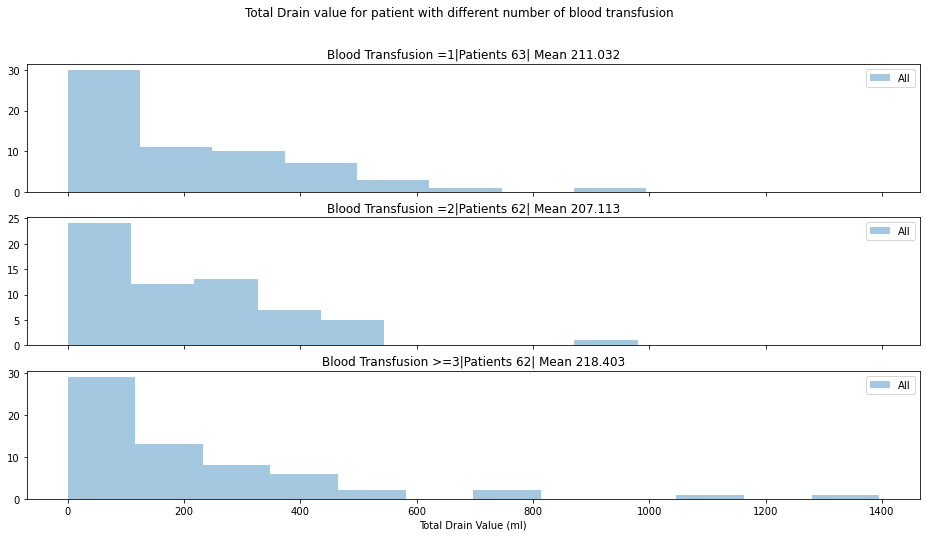

In [143]:

row = 3
col = 1
fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
fig.suptitle('Total Drain value for patient with different number of blood transfusion')


for axes_num1 in range(3):
    count = axes_num1+1
    df = drain_blood_counts
   
    if(count==3):
        partial_fbt_time_differece_Hb = df.loc[(df.counts >= count)]
    else:
        partial_fbt_time_differece_Hb = df.loc[(df.counts == count)]
    
#     male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'M']
#     sns.kdeplot(ax=axes[axes_num1],x=male_Hb['pre_transfusion'], label='male')
#     female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'F']
#     sns.kdeplot(ax=axes[axes_num1],x=female_Hb['pre_transfusion'],label='female')
    sns.distplot(x= partial_fbt_time_differece_Hb['total_drain'],label='All',kde= False,ax=axes[axes_num1])
    
    mean= partial_fbt_time_differece_Hb.mean().total_drain
    
    if(count==3):
        axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
    else:
        axes[axes_num1].set_title('Blood Transfusion ='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
    
  
    axes[2].set_xlabel("Total Drain Value (ml)")
    axes[axes_num1].legend(loc='upper right')
    
    
fig.savefig(f'Additional_Hb_plots/multihistplots_total_drain_Bloodtransfusion.png')
fig.show()

/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/2260528826.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean= partial_fbt_time_differece_Hb.mean().total_drain
/var/folders/p0/jx_f4_wx39gdhmtt0qjtcw2r0000gn/T/ipykernel_3852/2260528826.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


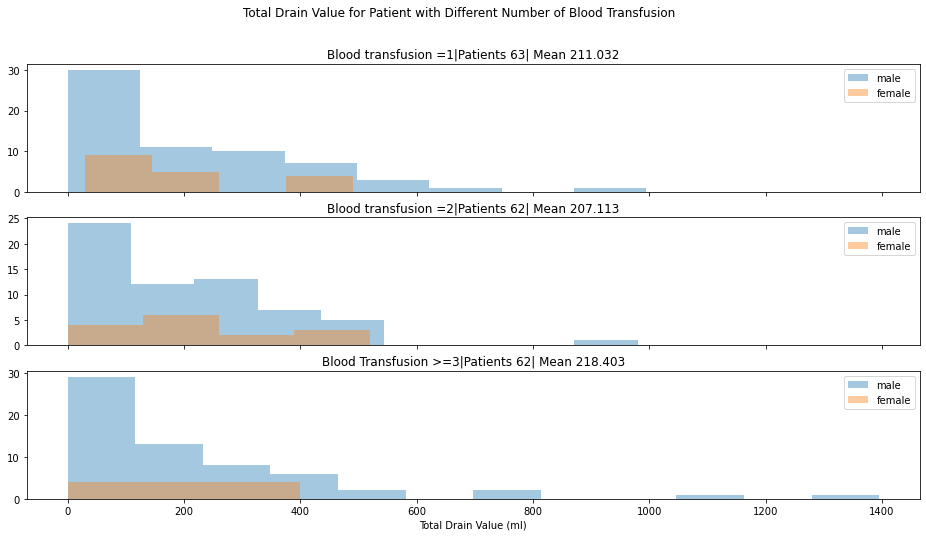

In [144]:
#value_diff
row = 3

col = 1
fig, axes = plt.subplots(row,sharex=True, figsize=(16,8))
fig.suptitle('Total Drain Value for Patient with Different Number of Blood Transfusion')


for axes_num1 in range(3):
    count = axes_num1+1
    df = drain_blood_counts
   
    if(count==3):
        partial_fbt_time_differece_Hb = df.loc[(df.counts >= count)]
    else:
        partial_fbt_time_differece_Hb = df.loc[(df.counts == count)]
    
    male_Hb = partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'M']
    sns.distplot(x= partial_fbt_time_differece_Hb['total_drain'],label='male',kde= False,ax=axes[axes_num1])
    female_Hb =partial_fbt_time_differece_Hb[partial_fbt_time_differece_Hb.gender_x == 'F']
    sns.distplot(ax=axes[axes_num1],x=female_Hb['total_drain'],kde= False,label='female')
    
#     sns.distplot(ax=axes[axes_num1],x= partial_fbt_time_differece_Hb['total_drain'],kde= False,label='male')
    mean= partial_fbt_time_differece_Hb.mean().total_drain
    #fmean = female_Hb.mean().pre_transfusion
    #mmean= male_Hb.mean().pre_transfusion
    
    if(count==3):
        axes[axes_num1].set_title('Blood Transfusion >='+str(count)+ 
                                  '|Patients '+str(len(partial_fbt_time_differece_Hb))+
                                  '| Mean ' + str(round(mean,3)))
                                  #+'| F Mean'+str(round(fmean,3)) +
                                                                                #'| M Mean'+str(round(mmean,3)))
    else:
        axes[axes_num1].set_title('Blood transfusion ='+str(count)+ '|Patients '+str(len(partial_fbt_time_differece_Hb))+'| Mean ' + str(round(mean,3)))
    
    axes[2].set_xlabel("Total Drain Value (ml)")
    axes[axes_num1].legend(loc='upper right')
fig.savefig(f'Additional_Hb_plots/multihistplots_total_drain_Bloodtransfusion_gender.png')
fig.show()

### Additional analysis on hemoglobin value difference under other variable
- ethnicity
- marital_status
- anchor_age
- anchor_year_group

In [145]:
df = pd.read_csv("time_difference_variables_added.csv")
df['anchor_age_bin'] = pd.cut(df.anchor_age, 5, precision=0)
df

,hadm_id,gender,anchor_age,anchor_year_group,insurance,language,marital_status,ethnicity,label,value_before,value_after,value_diff,valueuom,charttime_before,first_blood_transfusion_starttime,charttime_after,labevent_time_diff_min,labevent_before_tranfusion_diff_min,labevent_after_tranfusion_diff_min,anchor_age_bin
0,20510896,M,75,2014 - 2016,Medicare,ENGLISH,MARRIED,WHITE,Hemoglobin,9.0,9.5,0.5,g/dL,2174-11-08T05:00:00,2174-11-08T15:30:00,2174-11-09T06:10:00,1510,630,880,"(66.0, 79.0]"
1,28315320,M,61,2014 - 2016,Other,ENGLISH,SINGLE,WHITE,Hemoglobin,9.7,9.7,0.0,g/dL,2196-09-28T03:28:00,2196-09-28T12:41:00,2196-09-29T03:25:00,1437,553,884,"(54.0, 66.0]"
2,27756767,M,56,2008 - 2010,Other,?,SINGLE,HISPANIC/LATINO,Hemoglobin,9.0,10.7,1.7,g/dL,2171-07-13T15:11:00,2171-07-13T19:27:00,2171-07-14T03:37:00,746,256,490,"(54.0, 66.0]"
3,28821526,F,59,2014 - 2016,Other,ENGLISH,MARRIED,WHITE,Hemoglobin,8.5,10.3,1.8,g/dL,2128-07-31T01:28:00,2128-07-31T18:06:00,2128-08-01T02:01:00,1473,998,475,"(54.0, 66.0]"
4,22245351,M,71,2011 - 2013,Medicare,ENGLISH,MARRIED,WHITE,Hemoglobin,7.6,10.2,2.6,g/dL,2145-05-15T02:59:00,2145-05-15T04:00:00,2145-05-16T02:07:00,1388,61,1327,"(66.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,21510286,M,59,2008 - 2010,Other,ENGLISH,MARRIED,WHITE,Hemoglobin,8.2,10.1,1.9,g/dL,2177-08-03T03:13:00,2177-08-03T04:24:00,2177-08-04T03:40:00,1467,71,1396,"(54.0, 66.0]"
230,20482084,M,50,2011 - 2013,Medicare,ENGLISH,SINGLE,WHITE,Hemoglobin,8.2,9.5,1.3,g/dL,2115-07-30T14:03:00,2115-07-30T14:57:00,2115-07-31T04:18:00,855,54,801,"(41.0, 54.0]"
231,29716402,M,67,2014 - 2016,Medicare,ENGLISH,MARRIED,WHITE,Hemoglobin,11.5,9.7,-1.8,g/dL,2174-06-20T17:14:00,2174-06-20T21:32:00,2174-06-21T01:42:00,508,258,250,"(66.0, 79.0]"
232,27810177,F,29,2008 - 2010,Medicare,ENGLISH,SINGLE,WHITE,Hemoglobin,8.3,8.9,0.6,g/dL,2158-04-08T13:00:00,2158-04-08T15:57:00,2158-04-09T01:50:00,770,177,593,"(29.0, 41.0]"


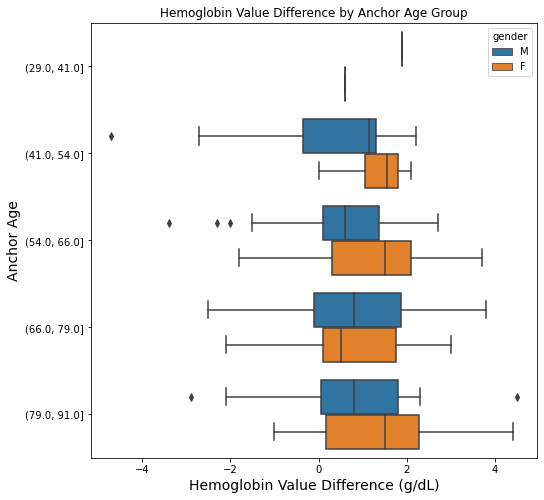

In [146]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='value_diff', y='anchor_age_bin', hue="gender")
plt.xlabel("Hemoglobin Value Difference (g/dL)", fontsize=14)
plt.ylabel("Anchor Age", fontsize=14)
plt.title("Hemoglobin Value Difference by Anchor Age Group")
plt.savefig(f'Additional_Hb_plots/boxplots_value_diff_anchor_age_bin.png')
plt.show()

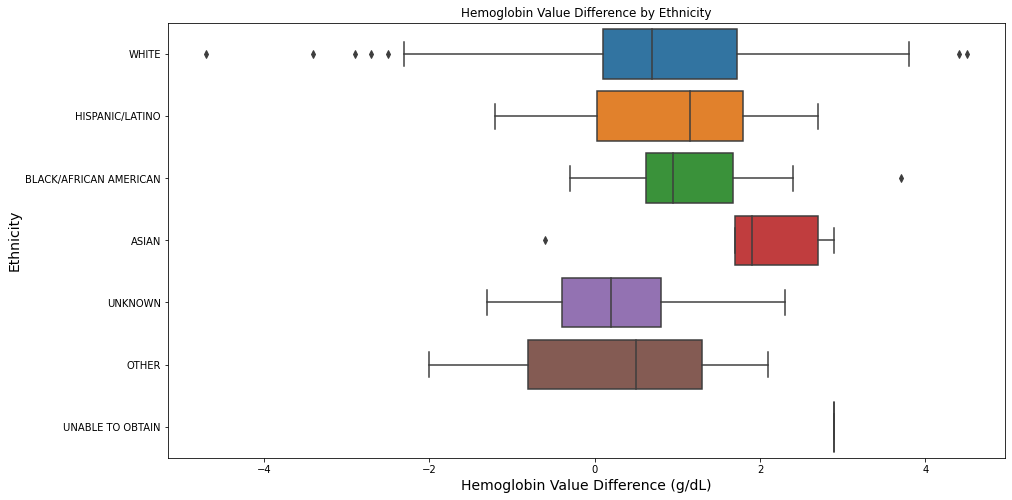

In [147]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='value_diff', y='ethnicity')
plt.xlabel("Hemoglobin Value Difference (g/dL)", fontsize=14)
plt.ylabel("Ethnicity", fontsize=14)
plt.title("Hemoglobin Value Difference by Ethnicity")
plt.savefig(f'Additional_Hb_plots/boxplots_value_diff_ethnicity.png')
plt.show()

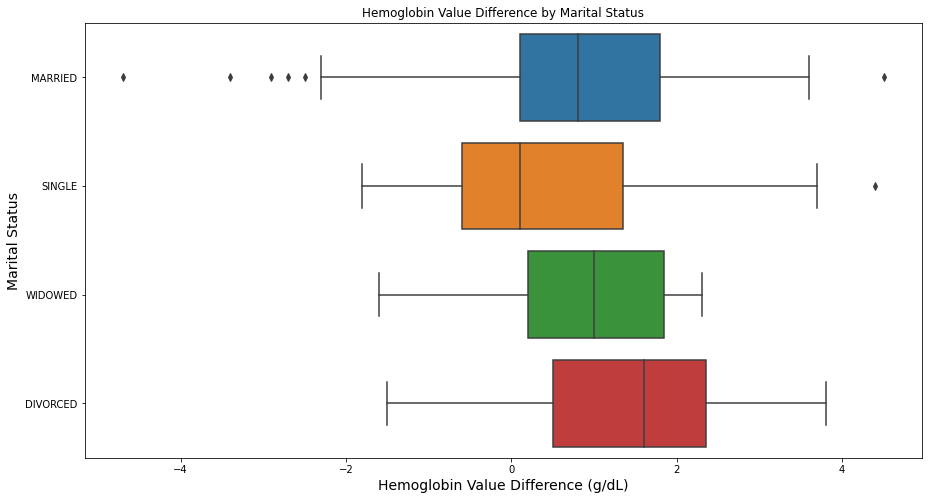

In [148]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='value_diff', y='marital_status')
plt.xlabel("Hemoglobin Value Difference (g/dL)", fontsize=14)
plt.ylabel("Marital Status", fontsize=14)
plt.title("Hemoglobin Value Difference by Marital Status")
plt.savefig(f'Additional_Hb_plots/boxplots_value_diff_marital_status.png')
plt.show()

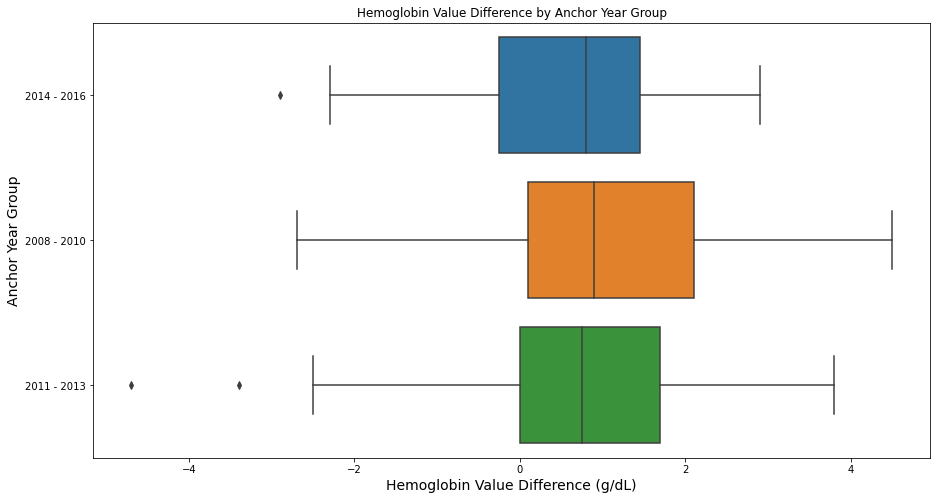

In [149]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='value_diff', y='anchor_year_group')
plt.xlabel("Hemoglobin Value Difference (g/dL)", fontsize=14)
plt.ylabel("Anchor Year Group", fontsize=14)
plt.title("Hemoglobin Value Difference by Anchor Year Group")
plt.savefig(f'Additional_Hb_plots/boxplots_value_diff_anchor_year_group.png')
plt.show()

### Additional analysis on value under different number of blood transfusion
- number of procedures taken
- icu stay time
- number of times enter icu


#### number of procedures taken

In [150]:
number_of_procedures = pd.read_csv('number_of_procedures.csv')
number_of_procedures_blood_counts = number_of_procedures.merge(blood_transfusion_count, how = 'right', on='hadm_id')
number_of_procedures_blood_counts

,hadm_id,number_of_procedure,gender,counts
0,20006999,6,M,2
1,20032691,2,F,1
2,20044587,3,M,3
3,20087019,4,F,3
4,20088888,3,M,3
...,...,...,...,...
227,29919383,3,F,2
228,29923776,7,M,4
229,29924353,2,M,4
230,29949404,3,M,2


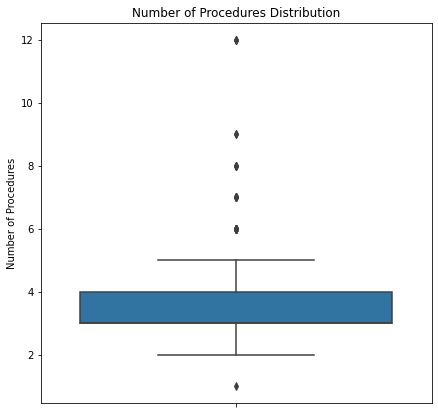

In [151]:
plt.figure(figsize=(7,7))
sns.boxplot(data=number_of_procedures_blood_counts, y="number_of_procedure")
plt.title("Number of Procedures Distribution")
plt.ylabel("Number of Procedures")
plt.savefig(f'Additional_CABG_plots/boxplots_number_of_procedure.png')
plt.show()

In [152]:
# plt.figure(figsize=(7,7))
# sns.boxplot(data=number_of_procedures_blood_counts, x="counts", y="number_of_procedure")
# plt.title("Boxplot for number of procedures under different number of blood transfusion")
# plt.savefig(f'Additional_bloodtransfusion_plots/boxplots_number_of_procedure_bllod_counts.png')
# plt.show()

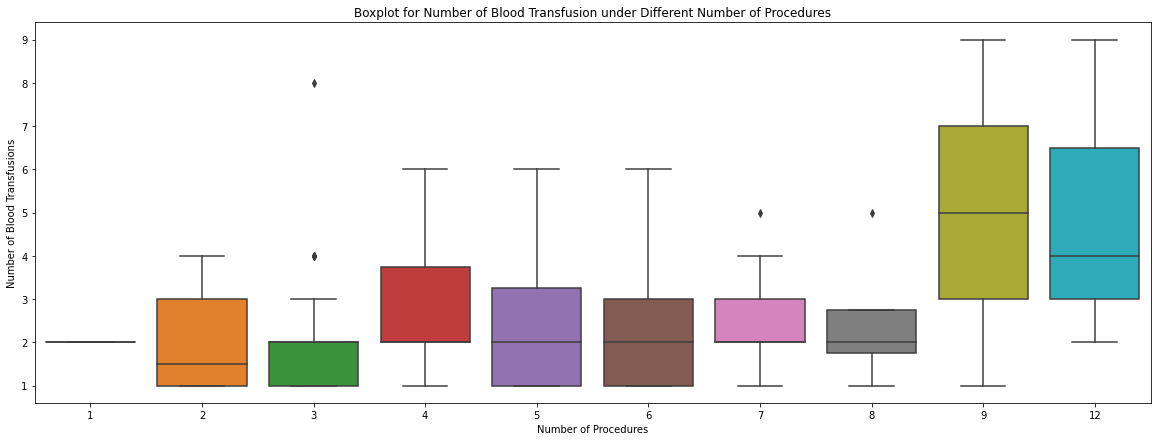

In [153]:
plt.figure(figsize=(20,7))
sns.boxplot(data=number_of_procedures_blood_counts, x="number_of_procedure", y="counts")
plt.title("Boxplot for Number of Blood Transfusion under Different Number of Procedures")
plt.xlabel("Number of Procedures")
plt.ylabel("Number of Blood Transfusions")
plt.savefig(f'Additional_bloodtransfusion_plots/boxplots_blood_transfusion_under_number_of_procedure.png')
plt.show()

#### Icu stay time


In [154]:
#icu_stay_time = pd.read_csv('icu_stay_time.csv')
icu_stay_time = pd.read_csv('icu_stay_time_day.csv')
icu_stay_time_blood_counts = icu_stay_time.merge(blood_transfusion_count, how = 'right', on='hadm_id')
# icu_stay_time_blood_counts
icu_stay_time

,hadm_id,gender,icu_stay_time
0,24302767,F,1
1,21670841,M,1
2,28444159,M,1
3,22977945,M,1
4,21056022,M,1
...,...,...,...
805,29636680,M,19
806,25043633,F,20
807,23427760,M,22
808,21582058,M,25


In [155]:
# MIMIC_icu_stay_time_days = icu_stay_time.icu_stay_time.values
# np.save('MIMIC_icu_stay_time_days', MIMIC_icu_stay_time_days)

In [156]:
# plt.figure(figsize=(7,7))
# sns.histplot(data=icu_stay_time_blood_counts, x="icu_stay_time")
# plt.title("Icu stay time distribution")
# plt.savefig(f'Additional_CABG_plots/histplot_icu_stay_time.png')
# plt.show()

In [157]:
def boxplot_icu_stay_time(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, y="icu_stay_time")
    #sns.histplot(data=icu_stay_time_blood_counts, x="icu_stay_time")
    plt.title("ICU Stay Time Distribution")
    plt.ylabel("ICU Stay Time (Minutes)")
    plt.savefig(f'Additional_CABG_plots/{name}_boxtplot_icu_stay_time.png')
    plt.show()

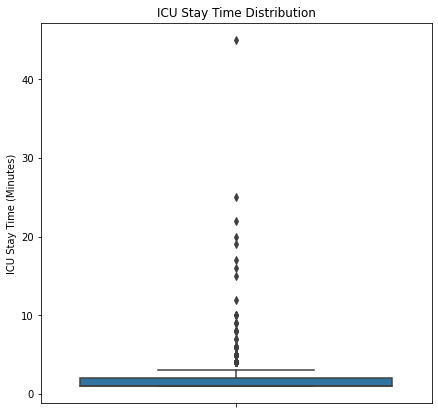

In [158]:
boxplot_icu_stay_time(icu_stay_time,"MIMIC")

In [159]:
icu_stay_time_blood_counts

,hadm_id,gender_x,icu_stay_time,gender_y,counts
0,20006999,M,3,M,2
1,20032691,F,1,F,1
2,20044587,M,2,M,3
3,20087019,F,2,F,3
4,20088888,M,5,M,3
...,...,...,...,...,...
227,29919383,F,2,F,2
228,29923776,M,10,M,4
229,29924353,M,3,M,4
230,29949404,M,1,M,2


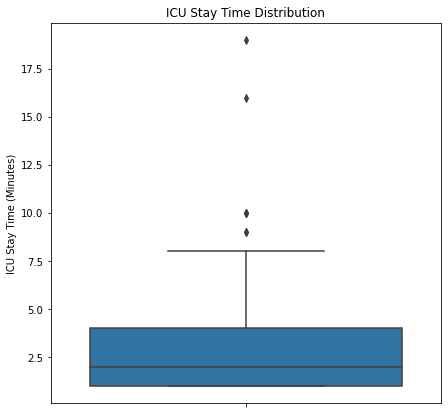

In [160]:
boxplot_icu_stay_time(icu_stay_time_blood_counts,"MIMIC_withbloodtranfusion")

In [161]:
def boxplots_icu_stay_time_bloodtransfusion(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, x="counts", y="icu_stay_time")
    plt.title("Boxplot for ICU Stay Time under Different Number of Blood Transfusions")
    plt.xlabel("Number of Blood Transfusions")
    plt.ylabel("ICU Stay Time (Minutes)")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_icu_stay_time_bloodtransfusion.png')
    plt.show()

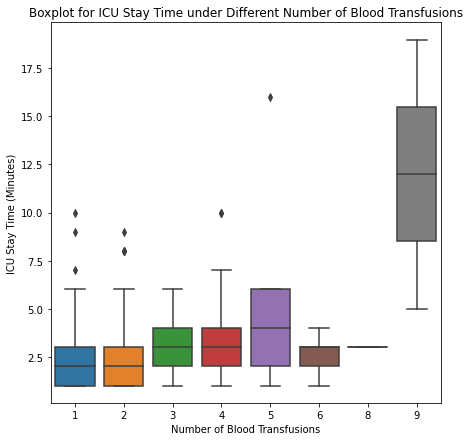

In [162]:
boxplots_icu_stay_time_bloodtransfusion(icu_stay_time_blood_counts,"MIMIC")

#### Number of times enter icu


In [163]:
enter_icu_times = pd.read_csv('enter_icu_times.csv')
enter_icu_timesblood_counts = enter_icu_times.merge(blood_transfusion_count, how = 'right', on='hadm_id')
enter_icu_timesblood_counts

,hadm_id,number_of_enter_icu,gender,counts
0,20006999,1,M,2
1,20032691,1,F,1
2,20044587,1,M,3
3,20087019,1,F,3
4,20088888,1,M,3
...,...,...,...,...
227,29919383,1,F,2
228,29923776,2,M,4
229,29924353,1,M,4
230,29949404,1,M,2


def boxplots_enter_icu__time_bloodtransfusion(enter_icu_timesblood_counts,name):
    plt.figure(figsize=(7,7))
    sns.boxplot(data=enter_icu_timesblood_counts, x="number_of_enter_icu", y="counts")
    plt.title("Boxplot for Number of Blood Transfusions under Different Times of Entering ICU")
    plt.ylabel("Number of Blood Transfusions")
    plt.xlabel("")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_enter_icu_times_bloodtransfusion.png')
    plt.show()

In [164]:
boxplots_enter_icu__time_bloodtransfusion(enter_icu_timesblood_counts,"MIMIC")

NameError: name 'boxplots_enter_icu__time_bloodtransfusion' is not defined

### Additional analysis on drugs taken under different number of blood transfusion
- proportion of patients who used a particular drug under different number of blood transfusion
    - boxplot
    - exact number
    - type of drugs under different number of blood transfusion

In [165]:
drug_blood_transfusion_count = pd.read_csv('drug_bloodcounts.csv')
# note the blood count 3 include blood count equal or greater to 3
drug_blood_transfusion_count


,proportion_patient,drug,blood_counts
0,1.000000,Mucinex,1
1,1.000000,Bupivacaine 0.75%,1
2,1.000000,Morphine Sulfate IR,1
3,1.000000,Amaryl,1
4,1.000000,Triamcinolone Acetonide 0.1% Cream,1
...,...,...,...
914,0.164216,Metoprolol Tartrate,3
915,0.148936,Warfarin,3
916,0.142857,PredniSONE,3
917,0.125000,Sodium CITRATE 4%,3


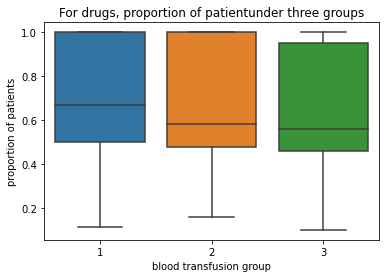

In [166]:
# note the blood count 3 include blood count equal or greater to 3
sns.boxplot(data=drug_blood_transfusion_count, x="blood_counts", y="proportion_patient")
plt.ylabel('proportion of patients')
plt.xlabel('blood transfusion group')
plt.title('For drugs, proportion of patientunder three groups')

plt.savefig(f'Additional_CABG_plots/boxplot_proportion_of_drug_bloodtransfusion.png')
plt.show()

In [167]:
all_took_drug_dict = dict()
df = drug_blood_transfusion_count
for i in np.unique(df.blood_counts):
    print(f"For blood count is {i}, there are {len(df[df.blood_counts == i])} distinct drug used")
    temp_df = df[df.blood_counts == i]
    print(f"There are {len(np.array(temp_df[temp_df.proportion_patient == 1.0].drug))} kinds of drugs all patients took")
    all_took_drug_dict[i] = set(np.array(temp_df[temp_df.proportion_patient == 1.0].drug))
    #print(f", they are:, {np.array(temp_df[temp_df.proportion_patient == 1.0].drug)}")

print(f"All patient took {all_took_drug_dict[1].intersection(all_took_drug_dict[2]).intersection(all_took_drug_dict[3])} drugs, {len(all_took_drug_dict[1].intersection(all_took_drug_dict[2]).intersection(all_took_drug_dict[3]))} in total  "  )






For blood count is 1, there are 301 distinct drug used
There are 90 kinds of drugs all patients took
For blood count is 2, there are 292 distinct drug used
There are 79 kinds of drugs all patients took
For blood count is 3, there are 326 distinct drug used
There are 80 kinds of drugs all patients took
All patient took {'Zolpidem Tartrate', 'Sucralfate', 'D10W', 'Phytonadione', 'Pantoprazole Sodium', 'Nitroglycerin SL'} drugs, 6 in total  


In [168]:
import itertools
stuff = [1, 2, 3]
for subset in itertools.permutations(stuff, 2):
        i = subset[0]
        j = subset[1]
        diff_drug = all_took_drug_dict[i] - all_took_drug_dict[j]
        print(f"Consider drug that all used under each blood transfusion, for patient get {i} blood transfusion compare to {j} blood transfusion, additional {len(diff_drug)} drugs {diff_drug} are shown in the mimic dataset \n")



Consider drug that all used under each blood transfusion, for patient get 1 blood transfusion compare to 2 blood transfusion, additional 75 drugs {'Sodium Bicarbonate', 'Sodium Chloride', 'Morphine Sulfate IR', 'NIFEdipine', 'Sodium Phosphate', 'Nitroglycerin Ointment  2%', 'Fluticasone-Salmeterol Diskus (100/50)', 'Famotidine', 'OxycoDONE-Acetaminophen Elixir', 'Ibuprofen', 'Hydrocortisone Na Succ.', 'Potassium Chloride (Powder)', 'NORepinephrine', 'Phentolamine Mesylate', 'Nitrofurantoin (Macrodantin)', 'Midodrine', 'Fluticasone-Salmeterol (250/50) ', 'Pyridostigmine Bromide', 'MethylPREDNISolone Sodium Succ', 'Fluticasone-Salmeterol Diskus (250/50) ', 'Tegretol XR', 'Iso-Osmotic Sodium Chloride', 'Levofloxacin', 'Desmopressin Acetate', 'Magnesium Citrate', 'Enalaprilat', 'Clonazepam', 'Neutra-Phos', 'Multivitamin IV', 'Nystatin', 'Nicotine Patch', 'Guaifenesin ER', 'Oxycodone SR (OxyconTIN)', 'Succinylcholine', 'BuPROPion (Sustained Release)', 'glimepiride', 'Fleet Enema', 'Morphine

------
## EPIC

In [169]:
# import pandas as pd
# import numpy as np
# from matplotlib import pyplot as plt
# import seaborn as sns
# from datetime import datetime
# xls = pd.ExcelFile('EPIC.xlsx')
# patients = pd.read_excel(xls, 'Patients')
# admissions = pd.read_excel(xls, 'Admissions')
# icu_stays = pd.read_excel(xls, 'ICU_Stays')
# bypass_surgeries = pd.read_excel(xls, 'Bypass_Surgeries')
# hemoblobin = pd.read_excel(xls, 'Haemoglobins')
# transfusion = pd.read_excel(xls, 'Transfusions')

In [170]:
# patients

### Blood transfusion

In [82]:
# transfusion_patient = transfusion.merge(patients, how = 'left', on='PATIENT_NUMBER')
# transfusion_patient.loc[transfusion_patient.BLOOD_START_TIME == "Null", 'BLOOD_END_TIME'] = transfusion_patient.BLOOD_START_TIME
# transfusion_patient_format = transfusion_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender", "VOLUME": "totalamount", "BLOOD_START_TIME": "starttime"}, errors="raise")

# transfusion_patient

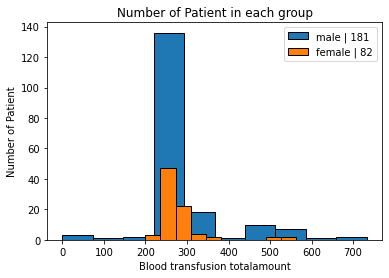

In [57]:
# histplot_bloodtransfusion_volume(transfusion_patient_format,"EPIC")

In [103]:
# blood_transfusion_count = transfusion_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='counts')
# #blood_transfusion_count = blood_transfusion_count.merge(transfusion_patient, how = 'inner', on='ADMISSION_NUMBER')
# #blood_transfusion_count = blood_transfusion_count.merge(patients, how = 'left', on='PATIENT_NUMBER')
# #hadm_id	gender	counts
# blood_transfusion_count_format = blood_transfusion_count.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
# blood_transfusion_count

NameError: name 'transfusion_patient' is not defined

In [104]:
# histplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")
# boxplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")

NameError: name 'blood_transfusion_count_format' is not defined

### Hemoglobin

## ICU

In [60]:
# #icu_stays_patient
# icu_stays_noicunumber=icu_stays.drop(columns=['ICU_STAY_NUMBER'])
# # there is some duplicate rows 
# icu_stays_noicunumber = icu_stays_noicunumber.drop_duplicates()
# icu_stays_noicunumber

,PATIENT_NUMBER,ADMISSION_NUMBER,ICU_START_TIME,ICU_END_TIME
0,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00
4,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00
8,118,96,2021-09-30 14:55:00,2021-10-01 15:31:00
11,219,233,2021-06-10 13:12:00,2021-06-11 17:16:00
14,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00
...,...,...,...,...
848,247,219,2022-07-14 16:08:00,2022-07-15 13:16:00
851,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00
854,139,105,2022-03-29 18:40:00,2022-03-30 13:39:00
857,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00


In [61]:
# icu_stays_patient = icu_stays_noicunumber.merge(patients, how = 'left', on='PATIENT_NUMBER')
# icu_stays_patient['ICU_START_TIME'] = pd.to_datetime(icu_stays_patient['ICU_START_TIME'])
# icu_stays_patient['ICU_END_TIME'] = pd.to_datetime(icu_stays_patient['ICU_END_TIME'])
# icu_stays_patient['icu_stay_time'] = (icu_stays_patient['ICU_END_TIME'] - icu_stays_patient['ICU_START_TIME']).dt.seconds/3600
# icu_total_stay_format = icu_stays_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
# icu_total_stay_format

,PATIENT_NUMBER,hadm_id,ICU_START_TIME,ICU_END_TIME,DOB,gender,icu_stay_time
0,39,110,2021-07-05 13:14:00,2021-07-07 15:49:00,1945-07-08,M,2.583333
1,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00,1952-03-03,M,20.783333
2,118,96,2021-09-30 14:55:00,2021-10-01 15:31:00,1945-12-29,M,0.600000
3,219,233,2021-06-10 13:12:00,2021-06-11 17:16:00,1946-05-03,M,4.066667
4,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00,1965-04-20,M,2.783333
...,...,...,...,...,...,...,...
175,247,219,2022-07-14 16:08:00,2022-07-15 13:16:00,1951-01-18,M,21.133333
176,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00,1950-07-14,F,0.500000
177,139,105,2022-03-29 18:40:00,2022-03-30 13:39:00,1950-07-13,M,18.983333
178,37,154,2022-03-10 13:39:00,2022-03-11 13:58:00,1987-06-15,F,0.316667


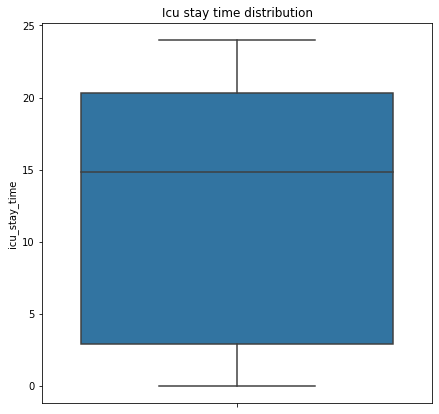

In [62]:
# boxplot_icu_stay_time(icu_total_stay_format,"EPIC")

In [63]:
# icu_stays_patient_bloodtransfusion = icu_stays_patient.merge(blood_transfusion_count, how = 'inner', on=['ADMISSION_NUMBER','Gender'])
# icu_stays_patient_bloodtransfusionformat = icu_stays_patient_bloodtransfusion.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
# icu_stays_patient_bloodtransfusion

,PATIENT_NUMBER,ADMISSION_NUMBER,ICU_START_TIME,ICU_END_TIME,DOB,Gender,icu_stay_time,counts
0,56,252,2021-02-24 16:25:00,2021-02-26 13:12:00,1952-03-03,M,20.783333,1
1,268,2,2021-06-19 14:54:00,2021-06-22 17:41:00,1965-04-20,M,2.783333,5
2,231,142,2021-08-05 14:32:00,2021-08-19 12:01:00,1972-11-02,M,21.483333,2
3,115,26,2021-09-12 07:00:00,2021-09-18 17:48:00,1946-04-22,M,10.800000,2
4,21,113,2021-04-01 13:41:00,2021-04-02 18:51:00,1965-03-26,M,5.166667,1
...,...,...,...,...,...,...,...,...
64,101,208,2022-04-27 14:51:00,2022-04-29 12:33:00,1957-01-14,M,21.700000,2
65,16,69,2022-07-07 18:47:00,2022-07-09 13:48:00,1940-11-21,M,19.016667,6
66,85,69,2022-07-28 18:47:00,2022-07-30 13:48:00,1940-12-12,M,19.016667,6
67,154,119,2022-02-08 13:55:00,2022-02-09 14:25:00,1950-07-14,F,0.500000,1


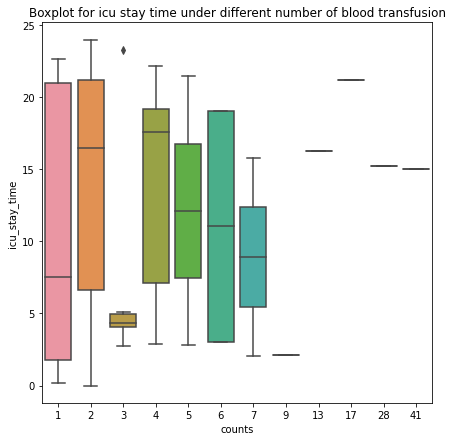

In [64]:
# boxplots_icu_stay_time_bloodtransfusion(icu_stays_patient_bloodtransfusion,"EPIC")

In [65]:
# icu_stays_times = icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='number_of_enter_icu')
# icu_stays_times

,ADMISSION_NUMBER,Gender,number_of_enter_icu
0,1,F,1
1,2,M,1
2,3,M,1
3,6,M,1
4,8,M,1
...,...,...,...
167,259,M,1
168,260,M,1
169,261,M,1
170,262,M,1


In [66]:
# icu_stays_times = icu_stays_times.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')
# icu_stays_timesformat = icu_stays_times.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
# icu_stays_times

,ADMISSION_NUMBER,Gender_x,number_of_enter_icu,Gender_y,counts
0,2,M,1,M,5
1,8,M,1,M,2
2,16,M,1,M,3
3,19,M,1,M,1
4,22,M,1,M,9
...,...,...,...,...,...
58,249,M,1,M,1
59,252,M,1,M,1
60,257,F,1,F,2
61,259,M,1,M,1


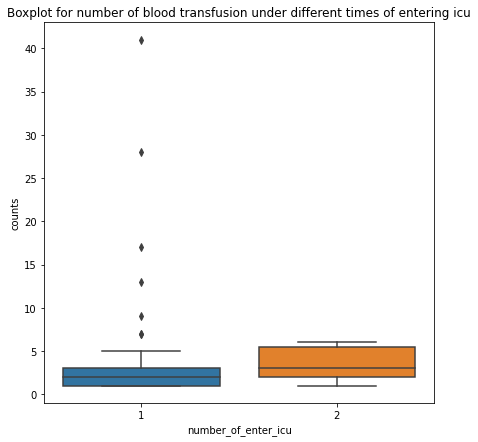

In [67]:
# boxplots_enter_icu__time_bloodtransfusion(icu_stays_timesformat,"EPIC")

In [68]:
# icu_total_stay=icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender'])['icu_stay_time'].agg(icu_stay_time='sum')
# #icu_total_stay = icu_total_stay.merge(icu_stays_patient, how = 'left', on='ADMISSION_NUMBER')
# #icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'left', on='ADMISSION_NUMBER')
# icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')

# icu_total_stay_format = icu_total_stay.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
# #hadm_id	icu_stay_time	gender	counts
# icu_total_stay

,ADMISSION_NUMBER,icu_stay_time,Gender,counts
0,2,2.783333,M,5
1,8,0.650000,M,2
2,16,5.066667,M,3
3,19,2.283333,M,1
4,22,2.116667,M,9
...,...,...,...,...
58,249,17.083333,M,1
59,252,20.783333,M,1
60,257,6.633333,F,2
61,259,1.200000,M,1


In [69]:
#icu_enter_times=icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender'])['icu_stay_time'].agg(icu_stay_time='sum')

In [70]:
# bypass_surgeries
# bypass_surgeries_patient = bypass_surgeries.merge(patients, how = 'left', on='PATIENT_NUMBER')
# bypass_surgeries_patient

,SURGERY_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,START_TIME,FINISH_TIME,DOB,Gender
0,1,111,111,2022-08-08 10:53:56,2022-08-08 16:19:00,1956-09-25,M
1,2,159,103,2021-06-16 12:57:19,2021-06-16 15:50:09,1965-11-05,M
2,3,191,161,2022-03-08 09:49:06,2022-03-08 15:54:00,1963-12-25,M
3,4,231,142,2021-08-05 09:11:26,2021-08-05 13:59:18,1972-11-02,M
4,5,122,77,2022-10-03 08:53:00,2022-10-03 14:22:30,1954-09-07,M
...,...,...,...,...,...,...,...
269,264,37,154,2022-03-10 08:49:05,2022-03-10 13:25:33,1987-06-15,F
270,265,28,199,2021-11-24 08:54:31,2021-11-24 13:52:25,1948-09-25,M
271,266,211,114,2022-09-01 08:50:00,2022-09-01 13:22:00,1954-12-08,M
272,267,110,152,2021-09-29 14:15:00,2021-09-29 17:35:00,1958-09-28,M


In [71]:
# bypass_surgeries_patient = bypass_surgeries_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='procedure_counts')
# bypass_surgeries_patient

,ADMISSION_NUMBER,Gender,procedure_counts
0,1,F,1
1,2,M,1
2,3,M,1
3,4,M,1
4,5,M,1
...,...,...,...
260,261,M,1
261,262,M,1
262,263,F,1
263,264,M,1


<AxesSubplot:ylabel='procedure_counts'>

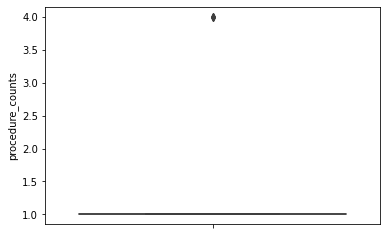

In [72]:
# sns.boxplot(data=bypass_surgeries_patient, y="procedure_counts")

# #plt.title('For drugs, proportion of patientunder three groups')